# Classification Mini Project

# House Grade Classification
Property buyers have different requirements. To facilitate this, real estate companies prefer categorizing 
various houses into different grades based on various parameters. This would help agents in identifying 
the type of house a customer is looking for. This way, the search for the house can be narrowed down 
by focusing only on the ‘condition of the house’.

The Grade (condition of the house that ranges from A (Best) - E (Worst)) can also be used by existing owners to list their properties for sale. Grading helps them in arriving at a price of the house.

**Business Objective**
- Build a predictive model to determine the Grade of 
house (The grades are A,B,C,D, and E)

### Importing Required Libraries

In [1]:
import pandas as pd                                                  # for working with dataframes
import numpy as np                                                   # for working with arrays
import matplotlib.pyplot as plt                                      # for visualizations
import seaborn as sb                                                 # for visualizations
from tabulate import tabulate                                        # for tabulations

from sklearn import preprocessing                                    # for preprocessing datas
from sklearn.preprocessing import StandardScaler,MinMaxScaler        # for data scaling
from sklearn.model_selection import train_test_split                 # for data splitting
from sklearn.linear_model import LogisticRegression                  # logistic regression model
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,f1_score,precision_score  # Evaluation metrics
from sklearn.naive_bayes import GaussianNB                           # Naive Bayes model
from sklearn.tree import DecisionTreeClassifier                      # decision tree classifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier  # for ensemble models
from sklearn.model_selection import GridSearchCV                     # Hyperparameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold,cross_val_score,KFold,StratifiedKFold,cross_validate # splitting and cross validation

import warnings
warnings.filterwarnings('ignore')                                       # to ignore warnings

### Loading the dataset

In [2]:
df = pd.read_csv('DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [3]:
df.tail()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
2995,2996,341,9,6,5,7,YES,95,115,5,90,2,4246,B
2996,2997,292,9,8,7,8,YES,116,87,7,97,4,3753,A
2997,2998,328,7,4,3,5,NO,0,78,5,95,6,3607,D
2998,2999,293,9,7,7,8,NO,0,78,7,51,3,4198,B
2999,3000,343,7,6,6,8,NO,0,108,5,95,3,4105,C


**Data Dictionary**:
- **Id** : Unique record identification number
- **Area(total)** : Total area of the house
- **Trooms** : Number of rooms in the house
- **Nbedrooms** : Number of bedrooms in the house
- **Nbwashrooms** : Number of attached washrooms with bedroom
- **Twashrooms** : Total number of washrooms
- **roof** : Does the house have a roof 
- **Roof(Area)** : Area of the roof
- **Lawn(Area)** : Area of the lawn
- **Nfloors** : Total floors
- **API** : Air pollution index level
- **ANB** : Average number belonging
- **Expectedprice** : Approximate cost price of the property
- **Grade** : The grade of the house/property  *(Target)*

### Shape of dataset

In [4]:
print('Shape   :',df.shape)
print('Rows    :',df.shape[0])
print('Columns :',df.shape[1])

Shape   : (3000, 14)
Rows    : 3000
Columns : 14


### Information of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


There are a total of 13 columns with 12 numerical and 2 categorical columns.

### Summary of DataSet

In [6]:
# Numerical columns
df.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [7]:
# Categorical columns
df.describe(include='object')

,roof,Grade
count,3000,3000
unique,2,5
top,YES,D
freq,1543,1270


### DataTypes of Dataset

In [8]:
df.dtypes

Id                 int64
Area(total)        int64
Trooms             int64
Nbedrooms          int64
Nbwashrooms        int64
Twashrooms         int64
roof              object
Roof(Area)         int64
Lawn(Area)         int64
Nfloors            int64
API                int64
ANB                int64
Expected price     int64
Grade             object
dtype: object

### Segregation of Qualitative & Quantitative data

In [9]:
a = df.select_dtypes(exclude='object')
b = df.select_dtypes(include='object')

a_lst = list(a.columns)
b_lst = list(b.columns)
table = [a_lst,b_lst]

print(tabulate({'Categorical':b_lst,
                 'Continuous':a_lst}, headers=['Categorical','Numerical']))

Categorical    Numerical
-------------  --------------
roof           Id
Grade          Area(total)
               Trooms
               Nbedrooms
               Nbwashrooms
               Twashrooms
               Roof(Area)
               Lawn(Area)
               Nfloors
               API
               ANB
               Expected price


### Checking for missing values

In [10]:
df.isna().sum()

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64

***There are no missing values in the dataset.***

## Visualizations

### House Availability Gradewise

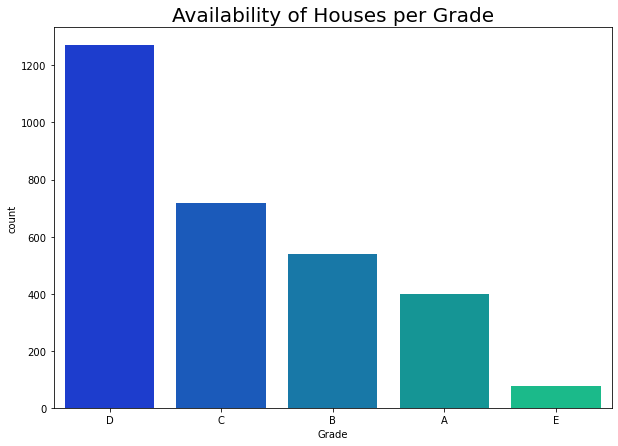

In [11]:
plt.figure(figsize=(10,7))
sb.countplot(df['Grade'],palette='winter')
plt.title('Availability of Houses per Grade',fontsize=20)
plt.show()

**Interpretation**:
- Availability of D grade houses are more compared to the other grades.
- Availability of E grade houses are the least.

### Availability of Houses with roof

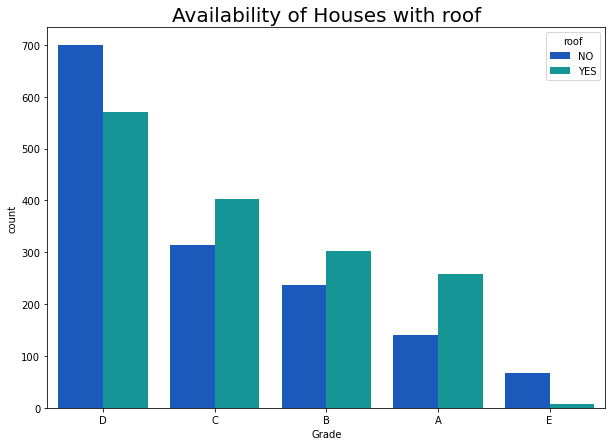

In [12]:
plt.figure(figsize=(10,7))
sb.countplot(df['Grade'],hue=df['roof'],palette='winter')
plt.title('Availability of Houses with roof',fontsize=20)
plt.show()

**Interpretation**:
- Grade D has more no. of houses with roof compared to other grades eventhough houses with no roof is higher in that grade.
- Least houses with roof are in grade E.

### Average Room Availability

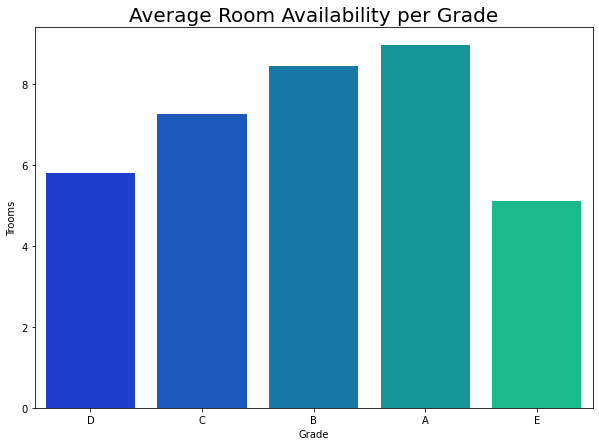

In [13]:
plt.figure(figsize=(10,7))
sb.barplot(x=df['Grade'],y=df['Trooms'],ci=None,palette='winter')
plt.title('Average Room Availability per Grade',fontsize=20)
plt.show()

**Interpretation**: Average availability of rooms in A grade houses are more and E grade houses are less compared to other grades.

### Area Distribution

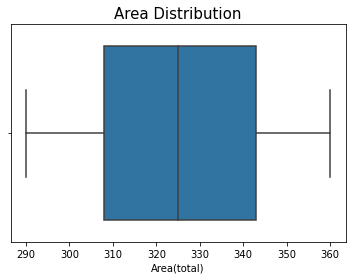

In [14]:
sb.boxplot(df['Area(total)'])
plt.title('Area Distribution',fontsize=15)
plt.show()

**Interpretation**: Most houses are of area between 310 to 340.

### Price Distribution

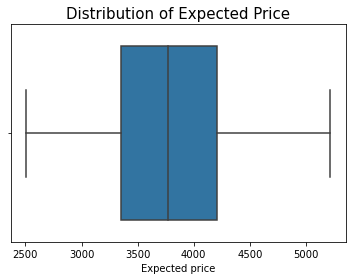

In [15]:
sb.boxplot(df['Expected price'])
plt.title('Distribution of Expected Price',fontsize=15)
plt.show()

**Interpretation**: Most houses are of priced between 3400 to 4200.

### Detailed overview of facilities of each grade

In [16]:
pt = df.pivot_table(values=['Area(total)','Trooms','Nbedrooms','Nbwashrooms','Twashrooms','Roof(Area)','Lawn(Area)','Nfloors','API','ANB','Expected price'],
              index='Grade',aggfunc='mean')

np.round(pt)

,ANB,API,Area(total),Expected price,Lawn(Area),Nbedrooms,Nbwashrooms,Nfloors,Roof(Area),Trooms,Twashrooms
Grade,,,,,,,,,,,
A,4.0,72.0,330.0,4457.0,97.0,7.0,7.0,6.0,62.0,9.0,9.0
B,3.0,72.0,327.0,4247.0,96.0,6.0,6.0,5.0,54.0,8.0,7.0
C,4.0,72.0,329.0,3887.0,97.0,5.0,5.0,4.0,54.0,7.0,6.0
D,3.0,69.0,322.0,3360.0,95.0,4.0,3.0,3.0,43.0,6.0,5.0
E,3.0,55.0,305.0,3031.0,88.0,3.0,2.0,2.0,8.0,5.0,3.0


**Interpretation**:
- Houses of Grade A has Area of about 330 , expected price of about 4457 with 7 Nbedrooms, 7 Nbwashrooms,6 Nfloors, 9 Trooms ,9 Twashrooms and roof area of about 62
- Houses of Grade B has Area of about 327 , expected price of about 4247 with 6 Nbedrooms, 6 Nbwashrooms,5 Nfloors, 8 Trooms ,7 Twashrooms and roof area of about 54
- Houses of Grade C has Area of about 329 , expected price of about 3887 with 5 Nbedrooms, 5 Nbwashrooms,4 Nfloors, 7 Trooms ,6 Twashrooms and roof area of about 54
- Houses of Grade D has Area of about 322 , expected price of about 3360 with 4 Nbedrooms, 3 Nbwashrooms,3 Nfloors, 6 Trooms ,5 Twashrooms and roof area of about 43
- Houses of Grade E has Area of about 305 , expected price of about 3031 with 3 Nbedrooms, 2 Nbwashrooms,2 Nfloors, 5 Trooms ,3 Twashrooms and roof area of about 8

### Converting Non Numeric to Categorical & Label Encoding

In [17]:
data = df.select_dtypes(include='object')
label_encoder = preprocessing.LabelEncoder()

for col in data.columns:
    df[col] = df[col].astype('category')
    df[col+'_encode'] = label_encoder.fit_transform(df[col])
    
df.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade,roof_encode,Grade_encode
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D,0,3
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D,1,3
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C,1,2
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D,1,3
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D,0,3


***The non numeric columns are converted to categorical dtype and label encoded with label encoder.***

### Feature Selection

<AxesSubplot:>

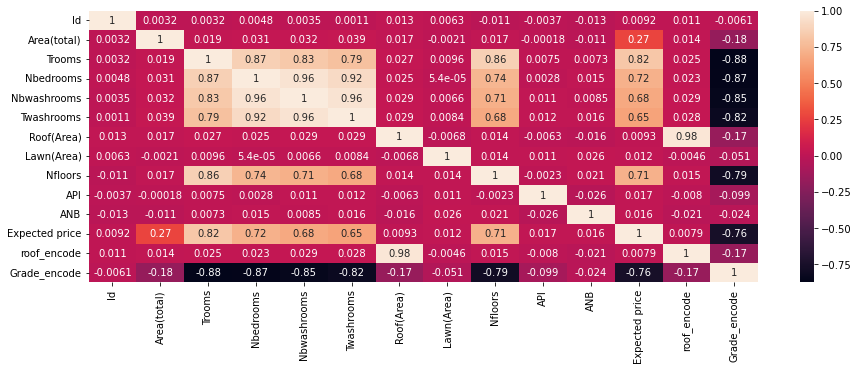

In [18]:
cor = df.corr()
plt.figure(figsize=(15,5))
sb.heatmap(cor,annot=True)

In [19]:
cor = abs(df.corr())
cor['Grade_encode'].sort_values(ascending=False)

Grade_encode      1.000000
Trooms            0.875145
Nbedrooms         0.865389
Nbwashrooms       0.847319
Twashrooms        0.819280
Nfloors           0.787623
Expected price    0.760820
Area(total)       0.177332
Roof(Area)        0.170259
roof_encode       0.166635
API               0.099000
Lawn(Area)        0.051200
ANB               0.024025
Id                0.006074
Name: Grade_encode, dtype: float64

**Interpretation**: On considering the correlation with the target column Trooms, Nbedrooms,Nbwashrooms, Twashrooms, Nfloors, Expected price, Area(total),Roof(Area) and roof_encode have a good correlation.

### Data Splitting

In [20]:
X = df[['Trooms','Nbedrooms','Nbwashrooms','Twashrooms','Nfloors','Expected price','Area(total)','Roof(Area)','roof_encode']]
y = df['Grade_encode']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=100)

In [21]:
print('X_train :',X_train.shape)
print('X_test  :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

X_train : (2100, 9)
X_test  : (900, 9)
y_train : (2100,)
y_test  : (900,)


**Data is splitted using train_test_split method at the ratio of 70:30**

### Data Scaling

In [22]:
data = df.drop(columns=['roof_encode','Grade_encode','roof','Grade'])
data.head()

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.to_numpy()),columns=X_train.columns)
X_test = scaler.transform(X_test.to_numpy())

***The numerical data are scaled using MinMaxScaler.***

# CLASSIFICATION MODELS

## Naive Bayes 

### Model Building

In [23]:
nv = GaussianNB()

### Model fitting

In [24]:
nv.fit(X_train,y_train)

GaussianNB()

### Predictions

In [25]:
nv_pred = nv.predict(X_test)
nv_pred

array([3, 3, 2, 3, 2, 2, 3, 2, 3, 1, 1, 3, 2, 1, 3, 3, 0, 2, 2, 0, 3, 3,
       2, 2, 1, 2, 3, 0, 2, 3, 3, 2, 2, 3, 0, 1, 3, 1, 3, 3, 4, 1, 1, 2,
       3, 3, 2, 2, 2, 2, 0, 2, 0, 1, 3, 1, 3, 3, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 3, 3, 2, 3, 1, 2, 3, 3, 4, 0, 3, 2, 3, 3, 3, 4, 3, 2, 1, 0, 0,
       3, 0, 1, 3, 2, 1, 2, 4, 3, 2, 3, 3, 2, 3, 2, 3, 1, 0, 2, 2, 3, 0,
       3, 3, 0, 1, 1, 2, 3, 2, 3, 3, 3, 3, 0, 4, 1, 3, 3, 3, 1, 3, 4, 3,
       2, 1, 1, 0, 3, 0, 1, 3, 3, 1, 2, 1, 3, 3, 1, 3, 2, 1, 3, 1, 2, 2,
       1, 1, 3, 0, 3, 3, 3, 0, 2, 1, 0, 1, 3, 3, 1, 3, 2, 0, 2, 3, 2, 0,
       0, 2, 1, 2, 3, 0, 0, 3, 3, 2, 2, 3, 2, 3, 3, 0, 3, 0, 3, 3, 2, 0,
       3, 3, 3, 1, 3, 0, 3, 3, 1, 3, 2, 1, 1, 2, 3, 3, 2, 1, 2, 3, 0, 3,
       2, 3, 0, 3, 4, 3, 3, 3, 1, 3, 1, 1, 2, 2, 3, 0, 2, 3, 0, 2, 2, 3,
       3, 1, 2, 2, 3, 3, 3, 1, 3, 0, 2, 3, 3, 2, 2, 2, 1, 1, 3, 3, 3, 1,
       2, 2, 1, 3, 1, 0, 3, 2, 4, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 2, 0,
       3, 3, 3, 2, 1, 2, 3, 2, 1, 1, 2, 0, 2, 1, 3,

### Performance Check

In [26]:
# Performance of training data and testing data
nv_train = nv.score(X_train,y_train)
nv_test = nv.score(X_test,y_test)

print(f'Performance of Training dataset: {np.round(nv_train*100)} %')
print(f'Performance of Testing dataset : {np.round(nv_test*100)} %')

Performance of Training dataset: 80.0 %
Performance of Testing dataset : 79.0 %


### Evaluation Metrics

In [27]:
# Confusion Matrix
print(confusion_matrix(y_test,nv_pred))


[[107  22   0   0   0]
 [ 17 133  24   0   0]
 [  0  30 141  31   0]
 [  0   0  47 312  14]
 [  0   0   0   8  14]]


In [28]:
nv_accuracy = np.round(accuracy_score(y_test, nv_pred)*100)
nv_recall = np.round(recall_score(y_test, nv_pred,average='weighted')*100)
nv_f1_score = np.round(f1_score(y_test, nv_pred,average='weighted')*100)
nv_precision = np.round(precision_score(y_test, nv_pred,average='weighted')*100)

print(f'accuracy  : {nv_accuracy} %')
print(f'recall    : {nv_recall} %')
print(f'f1-score  : {nv_f1_score} %')
print(f'precision : {nv_precision} %')

accuracy  : 79.0 %
recall    : 79.0 %
f1-score  : 79.0 %
precision : 79.0 %


### Evaluation Metrics with KFold split

In [29]:
# Kfold Splitting

cv = KFold(n_splits=4,shuffle=True,random_state=100)
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
n_scores = cross_validate(nv, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')

nv_kaccuracy = np.round(n_scores['test_accuracy'].mean()*100)
nv_kprecision = np.round(n_scores['test_precision_weighted'].mean()*100)
nv_krecall = np.round(n_scores['test_recall_weighted'].mean()*100)
nv_kf1 = np.round(n_scores['test_f1_weighted'].mean()*100)

print(f'Accuracy  : {nv_kaccuracy} %')
print(f'Precision : {nv_kprecision} %')
print(f'Recall    : {nv_krecall} %')
print(f'f1        : {nv_kf1} %')

Accuracy  : 79.0 %
Precision : 81.0 %
Recall    : 79.0 %
f1        : 80.0 %


### Evaluation Metrics with Reapeated Stratified KFold splits

In [30]:
# RepeatedStratifiedKfold Splitting

cv2 = RepeatedStratifiedKFold(n_splits=4,n_repeats=4,random_state=100)
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
n_scores = cross_validate(nv, X, y, scoring=scoring, cv=cv2, n_jobs=-1, error_score='raise')

nv_rsaccuracy = np.round(n_scores['test_accuracy'].mean()*100)
nv_rsprecision = np.round(n_scores['test_precision_weighted'].mean()*100)
nv_rsrecall = np.round(n_scores['test_recall_weighted'].mean()*100)
nv_rsf1 = np.round(n_scores['test_f1_weighted'].mean()*100)

print(f'Accuracy  : {nv_rsaccuracy} %')
print(f'Precision : {nv_rsprecision} %')
print(f'Recall    : {nv_rsrecall} %')
print(f'f1        : {nv_rsf1} %')

Accuracy  : 80.0 %
Precision : 81.0 %
Recall    : 80.0 %
f1        : 80.0 %


**Interpretation**:
- On using Naive Bayes model for the prediction of grades of houses we get accuracy,recall,precision and f1 score of about 79% by using train test splitting.
- Using KFold splitting we get accuracy and recall score of about 79% and precision score of about 81% and f1 score of about 80%.
- Using Repeated Stratisied KFold split we get accuracy, recall and f1 scores of about 80% and precision score of about 81%. 
- **On using Repeated Stratified KFold split for this model we get a good metric scores compared to other splits.**

## Decision tree Classifier

### Model Building

In [31]:
dtc = DecisionTreeClassifier()

### Model Fitting

In [32]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions

In [33]:
dtc_pred = dtc.predict(X_test)
dtc_pred

array([3, 3, 2, 3, 3, 1, 3, 2, 3, 2, 1, 3, 3, 0, 3, 3, 0, 1, 3, 0, 2, 3,
       2, 1, 1, 2, 3, 0, 2, 3, 3, 2, 2, 3, 0, 1, 3, 1, 3, 3, 4, 1, 1, 1,
       3, 3, 2, 2, 2, 3, 0, 2, 0, 2, 3, 1, 3, 3, 3, 1, 2, 3, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 2, 3, 2, 3, 0, 3, 2, 3, 3, 3, 4, 3, 2, 0, 0, 0,
       3, 0, 1, 2, 1, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 0, 2, 3, 3, 0,
       2, 3, 1, 2, 1, 2, 3, 1, 3, 3, 3, 3, 0, 4, 2, 3, 3, 3, 2, 3, 4, 3,
       2, 1, 1, 0, 3, 0, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 2, 1, 3, 1, 3, 2,
       1, 2, 3, 0, 3, 3, 3, 0, 3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 3, 3, 2, 0,
       1, 3, 1, 2, 3, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 0, 3, 3, 2, 0,
       3, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3, 1, 0, 2, 3, 3, 2, 1, 3, 3, 1, 2,
       2, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 1, 2, 2, 3, 0, 3, 3, 0, 1, 2, 3,
       2, 1, 3, 2, 3, 3, 3, 0, 3, 0, 2, 4, 3, 2, 2, 3, 1, 1, 3, 3, 3, 1,
       2, 2, 1, 3, 1, 0, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 1, 2, 0,
       2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 0, 2, 0, 3,

### Performance Check

In [34]:
# Performance of training data and testing data
dtc_train = dtc.score(X_train,y_train)
dtc_test = dtc.score(X_test,y_test)

print(f'Performance of Training dataset: {np.round(dtc_train*100)} %')
print(f'Performance of Testing dataset : {np.round(dtc_test*100)} %')

Performance of Training dataset: 100.0 %
Performance of Testing dataset : 82.0 %


### Evaluation Metrics

In [35]:
# Confusion Matrix
print(confusion_matrix(y_test,dtc_pred))

[[114  15   0   0   0]
 [ 24 123  27   0   0]
 [  0  15 153  34   0]
 [  0   0  27 336  10]
 [  0   0   0  14   8]]


In [36]:
accuracy = np.round(accuracy_score(y_test, dtc_pred)*100)
recall = np.round(recall_score(y_test, dtc_pred,average='weighted')*100)
f1_score = np.round(f1_score(y_test, dtc_pred,average='weighted')*100)
precision = np.round(precision_score(y_test, dtc_pred,average='weighted')*100)

print(f'accuracy  : {accuracy} %')
print(f'recall    : {recall} %')
print(f'f1-score  : {f1_score} %')
print(f'precision : {precision} %')

accuracy  : 82.0 %
recall    : 82.0 %
f1-score  : 81.0 %
precision : 81.0 %


**Interpretation**: As data seems to be overfitting we can find best parameters using hyperparameter tuning (GRIDSEARCHCV)

### Using GRIDSEARCH to find optimum hyperparameters

In [37]:
# Grid Search 
# Setting parameters for grid search
params = {
          'max_depth':[8,10,12,14,16,18,20],
          'min_samples_split':[5,10,15,20,25],
          'max_leaf_nodes':[10,15,20,30,40,50]
}

In [38]:
grid_search = GridSearchCV(estimator=dtc,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [39]:
# Fitting train datas to Grid search model
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 210 candidates, totalling 840 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12, 14, 16, 18, 20],
                         'max_leaf_nodes': [10, 15, 20, 30, 40, 50],
                         'min_samples_split': [5, 10, 15, 20, 25]},
             scoring='accuracy', verbose=1)

In [40]:
# Best score
grid_search.best_score_

0.8371428571428572

In [41]:
# Best estimators
rf_best = grid_search.best_estimator_
rf_best 

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_split=25)

### Building the Decision tree classifier with best hyperparameters

In [42]:
dtc1 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_split=25)

### Model Fitting

In [43]:
dtc1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=30, min_samples_split=25)

### Model Prediction

In [44]:
dtc1_pred = dtc1.predict(X_test)
dtc1_pred

array([3, 3, 2, 3, 3, 2, 3, 2, 2, 1, 1, 3, 3, 1, 3, 3, 0, 2, 2, 0, 3, 3,
       2, 2, 1, 2, 3, 0, 2, 3, 3, 2, 3, 3, 0, 1, 3, 1, 3, 3, 3, 1, 2, 1,
       4, 3, 2, 2, 2, 3, 0, 2, 0, 2, 2, 1, 3, 3, 3, 0, 2, 3, 1, 2, 2, 3,
       3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 0, 3, 2, 3, 3, 3, 4, 3, 2, 1, 0, 0,
       3, 0, 1, 3, 2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 0, 2, 3, 3, 1,
       3, 3, 1, 2, 1, 2, 3, 2, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 2, 3, 3, 3,
       2, 1, 0, 0, 3, 0, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 2, 1, 3, 1, 3, 2,
       1, 2, 3, 0, 3, 3, 3, 0, 3, 1, 0, 2, 3, 3, 1, 3, 2, 1, 3, 3, 2, 0,
       1, 3, 1, 2, 3, 0, 0, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 0,
       3, 3, 3, 2, 3, 0, 3, 3, 0, 3, 3, 1, 1, 2, 3, 3, 3, 1, 3, 3, 0, 3,
       3, 3, 0, 3, 3, 3, 3, 3, 1, 2, 0, 2, 2, 2, 3, 0, 3, 3, 0, 1, 2, 3,
       2, 1, 3, 2, 3, 3, 3, 0, 3, 0, 2, 3, 3, 2, 3, 3, 1, 1, 3, 3, 3, 1,
       2, 3, 1, 3, 1, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 1, 2, 0,
       3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 0, 2, 1, 3,

### Performance Check

In [45]:
dtc1_train = dtc1.score(X_train,y_train)
dtc1_test = dtc1.score(X_test,y_test)

print(f"Performance of train dataset = {np.round(dtc1_train*100)} %")
print(f"Performance of test dataset  = {np.round(dtc1_test*100)} %")

Performance of train dataset = 87.0 %
Performance of test dataset  = 82.0 %


### Evaluation Metrics

In [46]:
# Confusion Matrix
print(confusion_matrix(y_test,dtc1_pred))

[[105  24   0   0   0]
 [ 12 134  28   0   0]
 [  0  16 141  45   0]
 [  0   0  15 354   4]
 [  0   0   0  19   3]]


In [47]:
from sklearn import metrics
dtc1_accuracy = np.round(accuracy_score(y_test, dtc1_pred)*100)
dtc1_recall = np.round(recall_score(y_test, dtc1_pred,average='weighted')*100)
dtc1_f1_score = np.round(metrics.f1_score(y_test, dtc1_pred,average='weighted')*100)
dtc1_precision = np.round(precision_score(y_test, dtc1_pred,average='weighted')*100)

print(f'accuracy  : {dtc1_accuracy} %')
print(f'recall    : {dtc1_recall} %')
print(f'f1-score  : {dtc1_f1_score} %')
print(f'precision : {dtc1_precision} %')

accuracy  : 82.0 %
recall    : 82.0 %
f1-score  : 81.0 %
precision : 81.0 %


### Evaluation Metrics using KFold splitting

In [48]:
# Kfold Splitting

cv = KFold(n_splits=4,shuffle=True,random_state=100)
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
n_scores = cross_validate(dtc1, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')

dtc1_kaccuracy = np.round(n_scores['test_accuracy'].mean()*100)
dtc1_kprecision = np.round(n_scores['test_precision_weighted'].mean()*100)
dtc1_krecall = np.round(n_scores['test_recall_weighted'].mean()*100)
dtc1_kf1 = np.round(n_scores['test_f1_weighted'].mean()*100)

print(f'Accuracy  : {dtc1_kaccuracy} %')
print(f'Precision : {dtc1_kprecision} %')
print(f'Recall    : {dtc1_krecall} %')
print(f'f1        : {dtc1_kf1} %')

Accuracy  : 84.0 %
Precision : 83.0 %
Recall    : 84.0 %
f1        : 83.0 %


### Evaluation Metrics using RepeatedStratifiedKFold

In [49]:
# RepeatedStratifiedKfold Splitting

cv2 = RepeatedStratifiedKFold(n_splits=4,n_repeats=4,random_state=100)
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
n_scores = cross_validate(dtc1, X, y, scoring=scoring, cv=cv2, n_jobs=-1, error_score='raise')

dtc1_rsaccuracy = np.round(n_scores['test_accuracy'].mean()*100)
dtc1_rsprecision = np.round(n_scores['test_precision_weighted'].mean()*100)
dtc1_rsrecall = np.round(n_scores['test_recall_weighted'].mean()*100)
dtc1_rsf1 = np.round(n_scores['test_f1_weighted'].mean()*100)

print(f'Accuracy  : {dtc1_rsaccuracy} %')
print(f'Precision : {dtc1_rsprecision} %')
print(f'Recall    : {dtc1_rsrecall} %')
print(f'f1        : {dtc1_rsf1} %')

Accuracy  : 83.0 %
Precision : 83.0 %
Recall    : 83.0 %
f1        : 83.0 %


**Interpretation**: 
- On using Decision tree classifier model for the prediction of grades of houses we get accuracy and recall scores of about 82% and precision and f1 scores of about 81%.
- On using KFold splitting we get accuracy and recall score of about 84% and precision, f1 score of about 83%.
- On using Repeated Stratified KFold splitting we get accuracy, precision, recall and f1 scores of about 83%.
- **KFold splitting and Repeated Stratified KFold split gives a good metric score for this model**

## Random Forest Classifier

### Model Building & Fitting

In [50]:
rfc = RandomForestClassifier().fit(X_train,y_train)

### Predictions

In [51]:
rfc_pred = rfc.predict(X_test)
rfc_pred

array([3, 3, 2, 3, 2, 2, 3, 2, 2, 1, 1, 3, 2, 1, 3, 3, 0, 2, 3, 0, 3, 3,
       2, 1, 2, 2, 3, 0, 2, 3, 3, 2, 2, 3, 0, 1, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 2, 2, 2, 3, 0, 2, 0, 2, 3, 1, 3, 3, 3, 0, 2, 3, 1, 2, 2, 3,
       3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 0, 3, 2, 3, 3, 3, 4, 3, 2, 1, 0, 0,
       3, 0, 1, 3, 2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 0, 2, 2, 3, 0,
       3, 3, 1, 2, 1, 2, 3, 2, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       2, 1, 1, 0, 3, 0, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 2, 1, 3, 1, 3, 2,
       1, 2, 3, 0, 3, 3, 3, 0, 3, 1, 0, 2, 3, 3, 1, 3, 2, 1, 3, 3, 2, 0,
       1, 3, 0, 2, 3, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 0, 3, 3, 2, 0,
       3, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3, 1, 1, 1, 3, 3, 2, 1, 2, 3, 0, 3,
       2, 3, 0, 3, 3, 3, 3, 3, 1, 2, 0, 1, 2, 2, 3, 0, 3, 3, 0, 1, 2, 3,
       2, 1, 3, 2, 3, 3, 3, 1, 3, 0, 2, 3, 3, 2, 2, 2, 1, 1, 3, 3, 3, 1,
       2, 3, 1, 3, 1, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 1, 2, 0,
       2, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 0, 2, 0, 3,

### Performance Check

In [52]:
rfc_train = rfc.score(X_train,y_train)
rfc_test = rfc.score(X_test,y_test)

print(f"Performance of train dataset = {np.round(rfc_train*100)} %")
print(f"Performance of test dataset  = {np.round(rfc_test*100)} %")

Performance of train dataset = 100.0 %
Performance of test dataset  = 86.0 %


### Evaluation Metrics

In [53]:
# Confusion Matrix
print(confusion_matrix(y_test,rfc_pred))


[[119  10   0   0   0]
 [ 13 134  27   0   0]
 [  0   9 167  26   0]
 [  0   0  19 351   3]
 [  0   0   0  15   7]]


In [54]:
rfc_accuracy = np.round(accuracy_score(y_test, rfc_pred)*100)
rfc_recall = np.round(recall_score(y_test, rfc_pred,average='weighted')*100)
rfc_f1_score = np.round(metrics.f1_score(y_test, rfc_pred,average='weighted')*100)
rfc_precision = np.round(precision_score(y_test, rfc_pred,average='weighted')*100)

print(f'accuracy  : {rfc_accuracy} %')
print(f'recall    : {rfc_recall} %')
print(f'f1-score  : {rfc_f1_score} %')
print(f'precision : {rfc_precision} %')

accuracy  : 86.0 %
recall    : 86.0 %
f1-score  : 86.0 %
precision : 86.0 %


**By using Grid Search hyperparameter tuning we can get optimum parameters that can be used for the model and can increase its performance**

### Using Grid Search CV to find best Hyperparameters

In [55]:
# setting parameters
params = {
    'max_depth': [2,3,5,10,12,15,20,25],
    'min_samples_leaf': [5,10,15,20,25,30,50],
    'n_estimators': [5,10,15,20,25,30,35,50]
}

In [56]:
grid_search = GridSearchCV(estimator=rfc,
                           param_grid=params,
                           cv = 5,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [57]:
# Fitting the train data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 448 candidates, totalling 2240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 12, 15, 20, 25],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 50],
                         'n_estimators': [5, 10, 15, 20, 25, 30, 35, 50]},
             scoring='accuracy', verbose=1)

In [58]:
# Best score
grid_search.best_score_

0.8742857142857143

In [59]:
# best estimator
grid_search.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=25)

### Model building using best Parameters

In [60]:
rfc1 = RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=50)

In [61]:
rfc1.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, n_estimators=50)

In [62]:
rfc1_pred = rfc1.predict(X_test)
rfc1_pred

array([3, 3, 2, 3, 3, 2, 3, 2, 2, 1, 1, 3, 2, 1, 3, 3, 0, 2, 2, 0, 3, 3,
       2, 1, 2, 2, 3, 0, 2, 3, 3, 2, 2, 3, 0, 1, 3, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 2, 2, 2, 3, 0, 2, 0, 2, 3, 1, 3, 3, 3, 0, 2, 3, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 2, 3, 3, 3, 0, 3, 2, 3, 3, 3, 4, 3, 2, 1, 0, 0,
       3, 0, 1, 3, 2, 1, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 1, 0, 2, 2, 3, 0,
       3, 3, 0, 2, 1, 2, 3, 2, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 2, 3, 4, 3,
       2, 1, 1, 0, 3, 0, 1, 3, 3, 2, 2, 1, 3, 3, 1, 3, 2, 1, 3, 1, 3, 2,
       1, 2, 3, 0, 3, 3, 3, 0, 3, 1, 0, 2, 3, 3, 1, 3, 2, 1, 3, 3, 2, 0,
       1, 3, 0, 2, 3, 0, 0, 3, 3, 3, 2, 3, 2, 3, 3, 0, 3, 0, 3, 3, 2, 0,
       3, 3, 3, 1, 3, 0, 3, 3, 0, 3, 3, 1, 1, 2, 3, 3, 2, 1, 2, 3, 0, 3,
       2, 3, 0, 3, 3, 3, 3, 3, 1, 2, 0, 2, 2, 2, 3, 0, 2, 3, 0, 2, 2, 3,
       2, 1, 3, 2, 3, 3, 3, 1, 3, 0, 2, 3, 3, 2, 2, 2, 1, 1, 3, 3, 3, 1,
       2, 3, 1, 3, 1, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 2, 1, 2, 0,
       3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 3, 0, 2, 1, 3,

### Performance Check


In [63]:
rfc1_train = rfc1.score(X_train,y_train)
rfc1_test = rfc1.score(X_test,y_test)

print(f"Performance of train dataset = {np.round(rfc1_train*100)} %")
print(f"Performance of test dataset  = {np.round(rfc1_test*100)} %")

Performance of train dataset = 92.0 %
Performance of test dataset  = 86.0 %


### Evaluation Metrics

In [64]:
rfc1_accuracy = np.round(accuracy_score(y_test, rfc1_pred)*100)
rfc1_recall = np.round(recall_score(y_test, rfc1_pred,average='weighted')*100)
rfc1_f1_score = np.round(metrics.f1_score(y_test, rfc1_pred,average='weighted')*100)
rfc1_precision = np.round(precision_score(y_test, rfc1_pred,average='weighted')*100)

print(f'accuracy  : {rfc1_accuracy} %')
print(f'recall    : {rfc1_recall} %')
print(f'f1-score  : {rfc1_f1_score} %')
print(f'precision : {rfc1_precision} %')

accuracy  : 86.0 %
recall    : 86.0 %
f1-score  : 86.0 %
precision : 87.0 %


### Evaluation Metrics using KFold splitting

In [65]:
# Kfold Splitting

cv = KFold(n_splits=4,shuffle=True,random_state=100)
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
n_scores = cross_validate(rfc1, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')

rfc1_kaccuracy = np.round(n_scores['test_accuracy'].mean()*100)
rfc1_kprecision = np.round(n_scores['test_precision_weighted'].mean()*100)
rfc1_krecall = np.round(n_scores['test_recall_weighted'].mean()*100)
rfc1_kf1 = np.round(n_scores['test_f1_weighted'].mean()*100)

print(f'Accuracy  : {rfc1_kaccuracy} %')
print(f'Precision : {rfc1_kprecision} %')
print(f'Recall    : {rfc1_krecall} %')
print(f'f1        : {rfc1_kf1} %')

Accuracy  : 87.0 %
Precision : 87.0 %
Recall    : 87.0 %
f1        : 87.0 %


### Evaluation Metrics using RepeatedStratifiedKFold

In [66]:
# RepeatedStratifiedKfold Splitting

cv2 = RepeatedStratifiedKFold(n_splits=4,n_repeats=4,random_state=100)
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
n_scores = cross_validate(rfc1, X, y, scoring=scoring, cv=cv2, n_jobs=-1, error_score='raise')

rfc1_rsaccuracy = np.round(n_scores['test_accuracy'].mean()*100)
rfc1_rsprecision = np.round(n_scores['test_precision_weighted'].mean()*100)
rfc1_rsrecall = np.round(n_scores['test_recall_weighted'].mean()*100)
rfc1_rsf1 = np.round(n_scores['test_f1_weighted'].mean()*100)

print(f'Accuracy  : {rfc1_rsaccuracy} %')
print(f'Precision : {rfc1_rsprecision} %')
print(f'Recall    : {rfc1_rsrecall} %')
print(f'f1        : {rfc1_rsf1} %')

Accuracy  : 87.0 %
Precision : 87.0 %
Recall    : 87.0 %
f1        : 87.0 %


**Interpretation**:
- On using Random Forest Classifier model for prediction of grades of houses we get accuracy, precision , recall and f1 scores of about 86% by using train test split method.
- Using KFold splitting we get accuracy , precision, recall and f1 scores of about 87%.
- Using RepeatedStratifiedKFold splitting we get accuracy, precision, recall and f1 scores of about 87%.
- **KFold and RepeatedStratifiedKFold split gives good metric scores for this model.**

## Stacking Classifier

In [67]:
# required Python libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

### Defining function for the model with base learners and meta learner

In [68]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svc', SVC()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = GaussianNB()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)  
    return model

### Model Building

In [69]:
model = get_stacking()

### Model Fitting

In [70]:
model.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svc', SVC()), ('bayes', GaussianNB())],
                   final_estimator=GaussianNB())

### Model Prediction

In [71]:
st_pred = model.predict(X_test)
st_pred

array([3, 3, 2, 3, 3, 2, 3, 2, 2, 1, 1, 4, 3, 0, 4, 3, 0, 2, 3, 0, 2, 2,
       2, 1, 1, 2, 3, 0, 1, 3, 4, 2, 2, 3, 0, 1, 3, 1, 4, 3, 4, 1, 1, 1,
       4, 3, 2, 2, 2, 3, 0, 2, 0, 2, 2, 1, 3, 3, 3, 0, 2, 3, 1, 2, 3, 3,
       3, 3, 4, 2, 4, 0, 2, 4, 3, 4, 0, 3, 2, 4, 3, 4, 4, 4, 2, 1, 0, 0,
       3, 0, 1, 2, 2, 1, 2, 4, 3, 2, 3, 3, 2, 4, 2, 4, 1, 0, 2, 2, 3, 0,
       2, 3, 0, 2, 1, 2, 3, 2, 3, 4, 3, 4, 0, 4, 2, 3, 3, 3, 2, 4, 4, 4,
       2, 1, 0, 0, 3, 0, 1, 3, 3, 2, 2, 1, 3, 3, 1, 4, 2, 1, 3, 1, 3, 2,
       1, 1, 3, 0, 4, 4, 3, 0, 2, 1, 0, 2, 3, 4, 1, 4, 2, 1, 3, 4, 2, 0,
       1, 3, 0, 2, 3, 0, 0, 3, 4, 3, 2, 3, 2, 4, 3, 0, 3, 0, 3, 3, 2, 0,
       3, 3, 4, 1, 4, 0, 3, 3, 0, 3, 3, 1, 1, 2, 3, 3, 2, 0, 2, 4, 0, 3,
       2, 3, 0, 4, 4, 3, 4, 4, 0, 2, 0, 1, 2, 2, 3, 0, 2, 3, 0, 1, 2, 4,
       2, 1, 2, 2, 3, 4, 2, 0, 4, 0, 2, 3, 4, 2, 2, 2, 1, 1, 3, 3, 3, 1,
       2, 3, 0, 4, 1, 0, 4, 2, 4, 3, 2, 4, 3, 4, 4, 1, 3, 2, 3, 1, 2, 0,
       2, 4, 3, 2, 1, 2, 3, 2, 1, 2, 3, 0, 2, 0, 3,

### Performance Check

In [72]:
st_train = model.score(X_train,y_train)
st_test = model.score(X_test,y_test)

print(f"Performance of train dataset = {np.round(st_train*100)} %")
print(f"Performance of test dataset  = {np.round(st_test*100)} %")

Performance of train dataset = 80.0 %
Performance of test dataset  = 77.0 %


### Evaluation Metrics

In [73]:
st_accuracy = np.round(accuracy_score(y_test, st_pred)*100)
st_recall = np.round(recall_score(y_test, st_pred,average='weighted')*100)
st_f1_score = np.round(metrics.f1_score(y_test, st_pred,average='weighted')*100)
st_precision = np.round(precision_score(y_test, st_pred,average='weighted')*100)

print(f'accuracy  : {st_accuracy} %')
print(f'recall    : {st_recall} %')
print(f'f1-score  : {st_f1_score} %')
print(f'precision : {st_precision} %')

accuracy  : 77.0 %
recall    : 77.0 %
f1-score  : 80.0 %
precision : 86.0 %


### Evaluation metrics using KFold split

In [74]:
model = get_stacking()

# evaluate the model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
n_scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
n_scores

{'fit_time': array([6.7248857 , 6.8065331 , 6.75613713, 6.74050975, 6.70925188,
        6.83468771, 6.70624089, 6.88119364, 6.80292916, 6.84981871]),
 'score_time': array([0.20408487, 0.18519187, 0.18960667, 0.21974444, 0.19757628,
        0.17705083, 0.19107151, 0.18120456, 0.20936012, 0.16247058]),
 'test_accuracy': array([0.55      , 0.57666667, 0.59333333, 0.55      , 0.58      ,
        0.58      , 0.55666667, 0.59333333, 0.54333333, 0.62666667]),
 'test_precision_weighted': array([0.69921646, 0.71884568, 0.75226823, 0.73135035, 0.73835188,
        0.71871277, 0.68098204, 0.72606856, 0.72350002, 0.76609451]),
 'test_recall_weighted': array([0.55      , 0.57666667, 0.59333333, 0.55      , 0.58      ,
        0.58      , 0.55666667, 0.59333333, 0.54333333, 0.62666667]),
 'test_f1_weighted': array([0.56531003, 0.60092662, 0.62786855, 0.57555643, 0.61975553,
        0.61124475, 0.57668085, 0.62480006, 0.58068176, 0.65159095])}

In [75]:
st_kaccuracy = np.round(n_scores['test_accuracy'].mean()*100)
st_kprecision = np.round(n_scores['test_precision_weighted'].mean()*100)
st_krecall = np.round(n_scores['test_recall_weighted'].mean()*100)
st_kf1 = np.round(n_scores['test_f1_weighted'].mean()*100)

print(f'Accuracy  : {st_kaccuracy} %')
print(f'Precision : {st_kprecision} %')
print(f'Recall    : {st_krecall} %')
print(f'f1        : {st_kf1} %')

Accuracy  : 57.0 %
Precision : 73.0 %
Recall    : 57.0 %
f1        : 60.0 %


### Evaluation metric using Repeated Stratified KFold split

In [76]:
# define the model
model = get_stacking()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ['accuracy','precision_weighted','recall_weighted','f1_weighted']
n_scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1, error_score='raise')
n_scores

{'fit_time': array([7.25170493, 7.34999371, 6.9616313 , 7.36303115, 7.29704499,
        8.3016963 , 8.25481653, 7.25371885, 7.56680417, 7.78142381,
        8.09519768, 8.30760002, 7.0789299 , 7.65969825, 7.32992792,
        8.39113593, 7.88853335, 7.67802858, 7.65326333, 7.44887805,
        8.17498422, 7.11952519, 8.08654785, 8.05011845, 6.146456  ,
        6.00541687, 6.13850212, 5.77414989, 6.01486516, 5.93560338]),
 'score_time': array([0.21960974, 0.24716043, 0.2199831 , 0.27340698, 0.22000074,
        0.23540735, 0.23500633, 0.21959805, 0.23527002, 0.2356348 ,
        0.23557472, 0.23502207, 0.21958518, 0.24484539, 0.20435739,
        0.20467734, 0.21987176, 0.23804665, 0.21987176, 0.2198801 ,
        0.18868089, 0.2048049 , 0.21254539, 0.17496371, 0.21992421,
        0.1254046 , 0.17594981, 0.14392567, 0.12537074, 0.1421032 ]),
 'test_accuracy': array([0.53333333, 0.56666667, 0.63      , 0.59666667, 0.59666667,
        0.59      , 0.57333333, 0.60666667, 0.57      , 0.57666667,
 

In [77]:
st_rsaccuracy = np.round(n_scores['test_accuracy'].mean()*100)
st_rsprecision = np.round(n_scores['test_precision_weighted'].mean()*100)
st_rsrecall = np.round(n_scores['test_recall_weighted'].mean()*100)
st_rsf1 = np.round(n_scores['test_f1_weighted'].mean()*100)

print(f'Accuracy  : {st_rsaccuracy} %')
print(f'Precision : {st_rsprecision} %')
print(f'Recall    : {st_rsrecall} %')
print(f'f1        : {st_rsf1} %')

Accuracy  : 58.0 %
Precision : 73.0 %
Recall    : 58.0 %
f1        : 61.0 %


**Interpretation**:
- On using Stacking Classifier model to predict the grades of houses we get accuracy and recall score of about 79%, f1 score of about 81% and precision acore as 86% using train test split.
- Using KFold split we get accuracy score as 80%, f1 score as 82% and precision and recall scores of about 88%.
- Using Repeated Stratified KFold split we get accuracy score as 80% , precision and recall score as 87% and f1 score as 82%.

## Conclusion

In [78]:
print('Using Train Test Splitting method:')
pd.DataFrame([[nv_accuracy,nv_precision,nv_f1_score,nv_recall],[dtc1_accuracy,dtc1_precision,dtc1_f1_score,dtc1_recall],
             [rfc1_accuracy,rfc1_precision,rfc1_f1_score,rfc1_recall],[st_accuracy,st_precision,st_f1_score,st_recall]],
            columns=['Accuracy','Precision','F1_score','Recall'],
            index = ['NaiveBayes','DecisionTreeClassifier','RandomForestClassifier','StackingClassifier'])

Using Train Test Splitting method:


,Accuracy,Precision,F1_score,Recall
NaiveBayes,79.0,79.0,79.0,79.0
DecisionTreeClassifier,82.0,81.0,81.0,82.0
RandomForestClassifier,86.0,87.0,86.0,86.0
StackingClassifier,77.0,86.0,80.0,77.0


**Interpretation**: 
- On comparing the metric scores obtained by the classification models on predicting the Grades of houses using the train test split method we can observe that Random forest classifier model gives best metric scores compared to other models.

In [79]:
print('Using KFold splitting method:')
pd.DataFrame([[nv_kaccuracy,nv_kprecision,nv_kf1,nv_krecall],[dtc1_kaccuracy,dtc1_kprecision,dtc1_kf1,dtc1_krecall],
             [rfc1_kaccuracy,rfc1_kprecision,rfc1_kf1,rfc1_krecall],[st_kaccuracy,st_kprecision,st_kf1,st_krecall]],
            columns=['Accuracy','Precision','F1_score','Recall'],
            index = ['NaiveBayes','DecisionTreeClassifier','RandomForestClassifier','StackingClassifier'])

Using KFold splitting method:


,Accuracy,Precision,F1_score,Recall
NaiveBayes,79.0,81.0,80.0,79.0
DecisionTreeClassifier,84.0,83.0,83.0,84.0
RandomForestClassifier,87.0,87.0,87.0,87.0
StackingClassifier,57.0,73.0,60.0,57.0


**Interpretation**: 
- On using KFold Splitting method on the dataset for prediction of grades of houses, Random Forest Classifier model gives best metric scores compared to the other models.

In [80]:
print('Using Repeated Stratified KFold Splitting method:')
pd.DataFrame([[nv_rsaccuracy,nv_rsprecision,nv_rsf1,nv_rsrecall],[dtc1_rsaccuracy,dtc1_rsprecision,dtc1_rsf1,dtc1_rsrecall],
             [rfc1_rsaccuracy,rfc1_rsprecision,rfc1_rsf1,rfc1_rsrecall],[st_rsaccuracy,st_rsprecision,st_rsf1,st_rsrecall]],
            columns=['Accuracy','Precision','F1_score','Recall'],
            index = ['NaiveBayes','DecisionTreeClassifier','RandomForestClassifier','StackingClassifier'])

Using Repeated Stratified KFold Splitting method:


,Accuracy,Precision,F1_score,Recall
NaiveBayes,80.0,81.0,80.0,80.0
DecisionTreeClassifier,83.0,83.0,83.0,83.0
RandomForestClassifier,87.0,87.0,87.0,87.0
StackingClassifier,58.0,73.0,61.0,58.0


**Interpretation**: 
- On using Repeated Stratified KFold Split method on the models, Random forest classifier gives a good metric score compared to other models.

## Random Forest Classifier is the best suited model for this dataset.

## Prediction using RandomForestClassifier:

In [84]:
# defining a function to get the inputs for our prediction

def inputs():
    Trooms = int(input('How many rooms do you expect:'))
    Nbedrooms = int(input('How many bedrooms do you expect:'))
    Nbwashrooms = int(input('How many attached washrooms do you expect:'))
    Twashrooms = int(input('How many total washrooms do you expect:'))
    Nfloors = int(input('How many floors do you expect:'))
    Expectedprice = float(input('What is your expected rental pay:'))
    Area = float(input('How much area do you expect:'))
    a = input('If you need a roof enter Y or N to skip:')
    if a.lower() =='y':
        roof = 1
        RoofArea = float(input('How much Roof Area do you expect:'))
    else:
        roof = 0
        RoofArea=0
    return [Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expectedprice,Area,RoofArea,roof]

def Predicter():
    lst = inputs()
    input_values = scaler.transform([lst])
    grade = rfc1.predict(input_values)
    if grade == [0]:
        grade= 'A'
    elif grade==[1]:
        grade='B'
    elif grade==[2]:
        grade='C'
    elif grade==[3]:
        grade = 'D'
    else:
        grade='E'
    return grade
    
grade = Predicter()
print('\n')
print('The House you are looking for comes under the grade:',grade)

How many rooms do you expect:7
How many bedrooms do you expect:5
How many attached washrooms do you expect:5
How many total washrooms do you expect:6
How many floors do you expect:4
What is your expected rental pay:3800
How much area do you expect:330
If you need a roof enter Y or N to skip:y
How much Roof Area do you expect:55


The House you are looking for comes under the grade: C


## Conclusion
- Thus on comparing the models in our data we can observe that RandomForestClassifier is the best suited model for our data.
- The Evaluation scores are also better for RandomforestClassifier model compared to the other models.

## Business Implementation:
- Thus by using this model we can predict the grades of the houses and monitor their prices and facilities a customer is looking for.
- It can also be helpful in obtaining the grades of the houses that may be available later.